In [88]:
from scipy.optimize import fsolve
import math
from __future__ import division

In [41]:
import mpmath as mp
from sympy.solvers import solve
import sympy as sp
from sympy import solveset, S
from sympy.abc import x
from sympy import Symbol, nonlinsolve
from sympy import nsolve

# Some simple examples 

In [20]:
x = Symbol('x')
solve(x**2, x)

[0]

In [53]:
y = Symbol('y')
z = Symbol('z')

system = [z**2-2*sp.cosh(y**2) -2, z*y -2]
vars = [z,y]
soln = nonlinsolve(system, vars)
print (soln)

def evalTuple(soln, var, sub):
    z = var
    res1 = soln.subs(z, sub)
    return res1

print (evalTuple(soln, z, 1))

{(z, 2/z)}
{(1, 2)}


# Ashok's Project

In [110]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
#fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')

In [26]:
def twoSolver(x, y, f1, f2):
    x = Symbol('%s') %(x)
    y = Symbol('%s') %(y)
    system = [f1, f2]
    vars = [x,y]
    soln = nonlinsolve(system, vars)
    return soln

In [105]:
def equations(T, J):
    J2 = J
    #m1, B = 0, 2
    m1 = Symbol('m1') 
    B = Symbol('B')
    b_exp = sp.cosh((m1/T)+4*J2/T)*sp.cosh((m1/T)-4*J2/T)/pow(sp.cosh(m1/T),2)
    f1 = sp.tanh(((1/T)-4*B)*m1)-m1
    f2 = (1/16)*sp.log(b_exp, math.e)-B

    system = [f1, f2]
    vars = [m1,B]
    soln = nonlinsolve(system, vars)
    res = evalTuple(soln, m1, 1)
    return res


print (equations(2, 0.1))


{(1, 0.0625*log(1.31207650332685/cosh(1/2)**2))}


In [94]:
# range() function does not support the float type
def frange(start, stop, step):
    i = start
    while i < stop:
        yield i
        i += step

In [ ]:
# Write solutions into .dat file 
Xs, Ys = [], []
with open('solutions.dat', 'w') as f:
    for T in frange(0.0, 1.2, 0.01):
        if T != 0:
            sol = equations(T, 0.1)
            print (T, sol)
        
            
            out = "%s, %s" %(str(T), str(sol))
            f.write(out+"\n")
f.close()


# Numerical Approach

In [90]:
def solve_m1_B(T, J):
    J2 = J
    #m1, B = 0, 2
    m1 = Symbol('m1') 
    B = Symbol('B')
    b_exp = sp.cosh((m1/T)+4*J2/T)*sp.cosh((m1/T)-4*J2/T)/pow(sp.cosh(m1/T),2)
    f1 = sp.tanh(((1/T)-4*B)*m1)-m1
    f2 = (1/16)*sp.log(b_exp, math.e)-B
    
    # syntax nsolve(functions2solve, vars2solve, initialguesses)
    soln = nsolve([f1,f2], [m1, B], [0.01,1])
    return soln


#print (solve_m1_B(1, 0.1))
# Get m1
solve_m1_B(1,0.1)[0]


1.79333118436021e-19

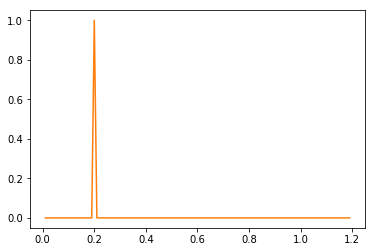

In [113]:
X, Y, Z = [], [], []
with open('numSolns.dat', 'w') as f1:
    for T in frange(0.0, 1.2, 0.01):
        if T != 0:
            m1 = solve_m1_B(T, 0.1)[0]
            B = solve_m1_B(T, 0.1)[1]
            #print (T, m1, B)
            X.append(T)
            Y.append(m1)
            Z.append(B)
            out = "%s, %s" %(str(T), str(m1))
            f1.write(out+"\n")

plt.plot(T, m1)
plt.plot(X, Y)
plt.show()
f1.close()

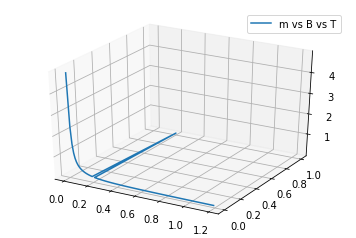

In [111]:
mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot(X, Y, Z, label='m vs B vs T')
ax.legend()

plt.show()

In [93]:
#!cat numSolns.dat

In [85]:
# Reading form file
"""
T, m1  = [], []
for line in open('numSolns.dat', 'r'):
    values = [float(s) for s in line.split()]
    T.append(values[0])
    m1.append(values[1])
plt.plot(T, m1)
plt.show()
"""

"\nT, m1  = [], []\nfor line in open('numSolns.dat', 'r'):\n    values = [float(s) for s in line.split()]\n    T.append(values[0])\n    m1.append(values[1])\nplt.plot(T, m1)\nplt.show()\n"

In [114]:
#!cat /Users/up/Downloads/lines3d_demo.py